In [118]:
import pandas as pd
import os
import numpy as np
import gc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report



df=pd.read_csv("/Users/vedantdwivedi/Desktop/TENNIS BET/Tennis model/tennis_atp_model_with_elo.csv", low_memory=False)

df.head()

,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,winner_hand,winner_ht,...,winner1_rank,winner1_rank_points,winner2_rank,winner2_rank_points,loser1_rank,loser1_rank_points,loser2_rank,loser2_rank_points,winner_elo,loser_elo
0,32.2464065708,David Goffin,R,163.0,BEL,NaN,L,190.0,NaN,NaN,...,60.0,35.0,20.0,13.0,10.0,5.0,10.0,NaN,1500.0,1500.0
1,26.9185489391,David Goffin,R,163.0,BEL,NaN,L,183.0,NaN,NaN,...,60.0,42.0,27.0,9.0,10.0,0.0,3.0,NaN,1500.0,1500.0
2,26.9185489391,David Goffin,R,163.0,BEL,NaN,R,183.0,NaN,NaN,...,76.0,61.0,47.0,9.0,12.0,3.0,4.0,NaN,1500.0,1500.0
3,27.2251882272,David Goffin,R,163.0,BEL,NaN,R,188.0,NaN,NaN,...,67.0,40.0,30.0,14.0,11.0,3.0,5.0,NaN,1500.0,1500.0
4,32.1259411362,Olivier Rochus,R,168.0,BEL,NaN,R,178.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1500.0,1500.0


In [157]:
csv_directory = "/Users/vedantdwivedi/tennis_atp_model"



# 🔹 Step 2: Read and Combine All CSV Files
all_files = [f for f in os.listdir(csv_directory) if f.startswith("atp_matches") and f.endswith(".csv")]
all_data = []

for file in all_files:
    df = pd.read_csv(os.path.join(csv_directory, file), dtype={'surface': 'str'}, low_memory=False)
    all_data.append(df)

# Merge all files into one DataFrame
data = pd.concat(all_data, ignore_index=True)

#save the data as a csv file
data.to_csv("/Users/vedantdwivedi/Desktop/Tennis Model data.csv")

print(data)


       tourney_id                tourney_name surface draw_size tourney_level  \
0       2019-M020                    Brisbane    Hard        32             A   
1       2019-M020                    Brisbane    Hard        32             A   
2       2019-M020                    Brisbane    Hard        32             A   
3       2019-M020                    Brisbane    Hard        32             A   
4       2019-M020                    Brisbane    Hard        32             A   
...           ...                         ...     ...       ...           ...   
968043   2014-605                 Tour Finals    Hard         8             F   
968044   2014-605                 Tour Finals    Hard         8             F   
968045  2014-D015  Davis Cup WG F: FRA vs SUI    Clay         4             D   
968046  2014-D015  Davis Cup WG F: FRA vs SUI    Clay         4             D   
968047  2014-D015  Davis Cup WG F: FRA vs SUI    Clay         4             D   

        tourney_date match_

In [158]:
from sklearn.preprocessing import LabelEncoder

# Convert a column to string
data['surface'] = data['surface'].astype('string')
data['tourney_date']=data['tourney_date'].astype('string')




print(data['surface'].dtype)

string


In [159]:
print(data['tourney_date'].dtype)


string


In [160]:
print(data['surface'].isna().sum())

4693


In [161]:
from sklearn.preprocessing import LabelEncoder

# Check for missing values
print("Missing values in 'surface':", data['surface'].isna().sum())

# Fill missing values with a placeholder
data['surface'] = data['surface'].fillna('Unknown')

# Convert the column to string (if not already)
data['surface'] = data['surface'].astype('string')

# Apply LabelEncoder
le = LabelEncoder()
data['surface'] = le.fit_transform(data['surface'])

# Verify the result
print(data)
print(data['tourney_date'].dtype)

Missing values in 'surface': 4693
       tourney_id                tourney_name  surface draw_size  \
0       2019-M020                    Brisbane     4408        32   
1       2019-M020                    Brisbane     4408        32   
2       2019-M020                    Brisbane     4408        32   
3       2019-M020                    Brisbane     4408        32   
4       2019-M020                    Brisbane     4408        32   
...           ...                         ...      ...       ...   
968043   2014-605                 Tour Finals     4408         8   
968044   2014-605                 Tour Finals     4408         8   
968045  2014-D015  Davis Cup WG F: FRA vs SUI     4406         4   
968046  2014-D015  Davis Cup WG F: FRA vs SUI     4406         4   
968047  2014-D015  Davis Cup WG F: FRA vs SUI     4406         4   

       tourney_level tourney_date match_num  winner_id winner_seed  \
0                  A   20181231.0       300   105453.0         2.0   
1        

In [124]:
print(data['tourney_date'].dtype)

string


In [162]:

data['tourney_date'] = data['tourney_date'].str[:8]
print(data)


       tourney_id                tourney_name  surface draw_size  \
0       2019-M020                    Brisbane     4408        32   
1       2019-M020                    Brisbane     4408        32   
2       2019-M020                    Brisbane     4408        32   
3       2019-M020                    Brisbane     4408        32   
4       2019-M020                    Brisbane     4408        32   
...           ...                         ...      ...       ...   
968043   2014-605                 Tour Finals     4408         8   
968044   2014-605                 Tour Finals     4408         8   
968045  2014-D015  Davis Cup WG F: FRA vs SUI     4406         4   
968046  2014-D015  Davis Cup WG F: FRA vs SUI     4406         4   
968047  2014-D015  Davis Cup WG F: FRA vs SUI     4406         4   

       tourney_level tourney_date match_num  winner_id winner_seed  \
0                  A     20181231       300   105453.0         2.0   
1                  A     20181231       299

In [143]:
print(data['tourney_date'][1670])

20190715


In [163]:
#Print any dates that do not follow the format YYYYMMDD, but without converting the datatype frpm string to datetime

# Define a regex pattern for YYYYMMDD
pattern = r'^\d{8}$'  # Matches exactly 8 digits (YYYYMMDD)

# Identify rows that do not match the pattern
invalid_dates = data[~data['tourney_date'].str.match(pattern, na=False)]

# Print invalid dates
print("Invalid dates with relevant columns:")
print(invalid_dates.shape)
print(invalid_dates[['tourney_date']].to_string(index=False))


Invalid dates with relevant columns:
(26399, 81)
tourney_date
       300.0
       299.0
       298.0
       297.0
       296.0
       295.0
       294.0
       293.0
       292.0
       291.0
       290.0
       289.0
       288.0
       287.0
       286.0
       285.0
       284.0
       283.0
       282.0
       281.0
       280.0
       279.0
       278.0
       300.0
       299.0
       298.0
       297.0
       296.0
       295.0
       294.0
       293.0
       292.0
       291.0
       290.0
       289.0
       288.0
       287.0
       286.0
       300.0
       299.0
       298.0
       297.0
       296.0
       295.0
       294.0
       293.0
       292.0
       291.0
       290.0
       289.0
       288.0
       287.0
       286.0
       300.0
       299.0
       298.0
       297.0
       296.0
       295.0
       294.0
       293.0
       292.0
       291.0
       290.0
       289.0
       288.0
       287.0
       286.0
       300.0
       299.0
       298.0
       297.0
  

In [145]:
#Print any dates that do not follow the format YYYYMMDD, but without converting the datatype frpm string to datetime

# Define a regex pattern for YYYYMMDD
# Define a regex pattern for YYYYMMDD
pattern = r'^\d{8}$'  # Matches exactly 8 digits (YYYYMMDD)

# Identify rows that do not match the pattern
invalid_dates = data[~data['tourney_date'].str.match(pattern, na=False)]

# Print only the 'tourney_date' column for invalid dates
print("Invalid tourney_date values that do not follow the format YYYYMMDD:")
print(invalid_dates[['tourney_date']].to_string(index=False))


Invalid tourney_date values that do not follow the format YYYYMMDD:
tourney_date
       300.0
       299.0
       298.0
       297.0
       296.0
       295.0
       294.0
       293.0
       292.0
       291.0
       290.0
       289.0
       288.0
       287.0
       286.0
       285.0
       284.0
       283.0
       282.0
       281.0
       280.0
       279.0
       278.0
       300.0
       299.0
       298.0
       297.0
       296.0
       295.0
       294.0
       293.0
       292.0
       291.0
       290.0
       289.0
       288.0
       287.0
       286.0
       300.0
       299.0
       298.0
       297.0
       296.0
       295.0
       294.0
       293.0
       292.0
       291.0
       290.0
       289.0
       288.0
       287.0
       286.0
       300.0
       299.0
       298.0
       297.0
       296.0
       295.0
       294.0
       293.0
       292.0
       291.0
       290.0
       289.0
       288.0
       287.0
       286.0
       300.0
       299.0
       29

In [146]:
print(data)

       tourney_id                tourney_name  surface draw_size  \
0       2019-M020                    Brisbane     4408        32   
1       2019-M020                    Brisbane     4408        32   
2       2019-M020                    Brisbane     4408        32   
3       2019-M020                    Brisbane     4408        32   
4       2019-M020                    Brisbane     4408        32   
...           ...                         ...      ...       ...   
968043   2014-605                 Tour Finals     4408         8   
968044   2014-605                 Tour Finals     4408         8   
968045  2014-D015  Davis Cup WG F: FRA vs SUI     4406         4   
968046  2014-D015  Davis Cup WG F: FRA vs SUI     4406         4   
968047  2014-D015  Davis Cup WG F: FRA vs SUI     4406         4   

       tourney_level tourney_date match_num  winner_id winner_seed  \
0                  A     20181231       300   105453.0         2.0   
1                  A     20181231       299

In [164]:
pattern = r'^\d{8}$'  # Matches exactly 8 digits (YYYYMMDD)

# Step 2: Replace invalid dates with a default date
data.loc[~data['tourney_date'].str.match(pattern, na=False), 'tourney_date'] = '19850101'

# Step 3: Print the updated DataFrame
print(data)

invalid_dates = data[~data['tourney_date'].str.match(pattern, na=False)]

# Print only the 'tourney_date' column for invalid dates
print("Invalid tourney_date values that do not follow the format YYYYMMDD:")
print(invalid_dates[['tourney_date']].to_string(index=False))



       tourney_id                tourney_name  surface draw_size  \
0       2019-M020                    Brisbane     4408        32   
1       2019-M020                    Brisbane     4408        32   
2       2019-M020                    Brisbane     4408        32   
3       2019-M020                    Brisbane     4408        32   
4       2019-M020                    Brisbane     4408        32   
...           ...                         ...      ...       ...   
968043   2014-605                 Tour Finals     4408         8   
968044   2014-605                 Tour Finals     4408         8   
968045  2014-D015  Davis Cup WG F: FRA vs SUI     4406         4   
968046  2014-D015  Davis Cup WG F: FRA vs SUI     4406         4   
968047  2014-D015  Davis Cup WG F: FRA vs SUI     4406         4   

       tourney_level tourney_date match_num  winner_id winner_seed  \
0                  A     20181231       300   105453.0         2.0   
1                  A     20181231       299

In [165]:
#Implementing an ELO rating system for tennis players

#Step 1:Default rating 

INITIAL_ELO = 1500
K_FACTOR = 32  # Higher K = more dynamic updates

# Dictionary to store Elo ratings
elo_ratings = {}

def get_elo(player_id):
    """Retrieve Elo rating for a player, initializing if not present."""
    return elo_ratings.get(player_id, INITIAL_ELO)

def update_elo(winner_id, loser_id):
    """Update Elo ratings based on match outcome."""
    R_winner = get_elo(winner_id)
    R_loser = get_elo(loser_id)

    # Calculate expected probabilities
    E_winner = 1 / (1 + 10 ** ((R_loser - R_winner) / 400))
    E_loser = 1 - E_winner  # Since E_winner + E_loser = 1

    # Update ratings
    new_R_winner = R_winner + K_FACTOR * (1 - E_winner)
    new_R_loser = R_loser + K_FACTOR * (0 - E_loser)

    # Save updated ratings
    elo_ratings[winner_id] = new_R_winner
    elo_ratings[loser_id] = new_R_loser

    return new_R_winner, new_R_loser

In [166]:
# Sort matches by date before updating Elo ratings
data = data.sort_values(by='tourney_date')

# 🔹 Step 4: Compute Elo Ratings and Add Them to Dataset
winner_elos, loser_elos = [], []
for index, row in data.iterrows():
    winner_id = row['winner_id']
    loser_id = row['loser_id']

    # Get current Elo ratings
    winner_elo, loser_elo = get_elo(winner_id), get_elo(loser_id)

    # Store Elo before update
    winner_elos.append(winner_elo)
    loser_elos.append(loser_elo)

    # Update ratings
    update_elo(winner_id, loser_id)

# Add Elo ratings to dataset
data['winner_elo'] = winner_elos
data['loser_elo'] = loser_elos

data.head()

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,winner1_rank,winner1_rank_points,winner2_rank,winner2_rank_points,loser1_rank,loser1_rank_points,loser2_rank,loser2_rank_points,winner_elo,loser_elo
575037,1877-540,Wimbledon,4407,32,G,18770709,19,113987.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1500.000000,1500.0
575039,1877-540,Wimbledon,4407,32,G,18770709,21,113987.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1516.000000,1500.0
575038,1877-540,Wimbledon,4407,32,G,18770709,20,113987.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1531.263693,1500.0
575036,1877-540,Wimbledon,4407,32,G,18770709,18,113963.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1485.435873,1500.0
575035,1877-540,Wimbledon,4407,32,G,18770709,17,113999.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1484.736307,1500.0


In [167]:
#Studying the elo ratings of different players

# Step 1: Get the Elo ratings of the top 10 players

top_players = sorted(elo_ratings.items(), key=lambda x: x[1], reverse=True)[:10]

print(top_players)

[(206173.0, 2767.718038461412), (104925.0, 2658.659195472716), (207989.0, 2587.8242051776965), (103819.0, 2562.4322607244226), (100644.0, 2543.406853492605), (104417.0, 2516.2746922446463), (126203.0, 2510.289213291928), (106401.0, 2491.0557555214837), (106421.0, 2470.1048241922595), (105223.0, 2468.998444044192)]


In [171]:
# Step 2: Print the Elo ratings of the top 10 players
print("Top 10 Players by Elo Rating:")
for player_id, elo in top_players:
    print(f"Player ID: {player_id}, Elo Rating: {elo}")
    

Top 10 Players by Elo Rating:
Player ID: 206173.0, Elo Rating: 2767.718038461412
Player ID: 104925.0, Elo Rating: 2658.659195472716
Player ID: 207989.0, Elo Rating: 2587.8242051776965
Player ID: 103819.0, Elo Rating: 2562.4322607244226
Player ID: 100644.0, Elo Rating: 2543.406853492605
Player ID: 104417.0, Elo Rating: 2516.2746922446463
Player ID: 126203.0, Elo Rating: 2510.289213291928
Player ID: 106401.0, Elo Rating: 2491.0557555214837
Player ID: 106421.0, Elo Rating: 2470.1048241922595
Player ID: 105223.0, Elo Rating: 2468.998444044192


In [155]:
print(data)



{'dates': [Timestamp('2003-08-18 00:00:00'), Timestamp('2003-08-25 00:00:00'), Timestamp('2003-09-01 00:00:00'), Timestamp('2004-04-26 00:00:00'), Timestamp('2004-05-10 00:00:00'), Timestamp('2004-05-10 00:00:00'), Timestamp('2004-08-30 00:00:00'), Timestamp('2004-09-13 00:00:00'), Timestamp('2004-10-18 00:00:00'), Timestamp('2004-10-18 00:00:00'), Timestamp('2004-11-01 00:00:00'), Timestamp('2004-11-01 00:00:00'), Timestamp('2004-11-01 00:00:00'), Timestamp('2004-11-08 00:00:00'), Timestamp('2004-11-08 00:00:00'), Timestamp('2004-11-15 00:00:00'), Timestamp('2004-11-22 00:00:00'), Timestamp('2004-11-22 00:00:00'), Timestamp('2005-01-10 00:00:00'), Timestamp('2005-01-10 00:00:00'), Timestamp('2005-01-10 00:00:00'), Timestamp('2005-01-17 00:00:00'), Timestamp('2005-01-24 00:00:00'), Timestamp('2005-01-24 00:00:00'), Timestamp('2005-01-31 00:00:00'), Timestamp('2005-01-31 00:00:00'), Timestamp('2005-01-31 00:00:00'), Timestamp('2005-01-31 00:00:00'), Timestamp('2005-01-31 00:00:00'), Tim

In [135]:
#206173, 104925, 207989, 103819, 100644, 104417, 126203, 106401, 106421, 105223  

/var/folders/tj/nw44rcqn4195jlc57470b60m0000gn/T/ipykernel_62244/4230805151.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['tourney_date'] = pd.to_datetime(filtered_data['tourney_date'], format='%Y%m%d')
/var/folders/tj/nw44rcqn4195jlc57470b60m0000gn/T/ipykernel_62244/4230805151.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  player_data['elo'] = player_data.apply(
/var/folders/tj/nw44rcqn4195jlc57470b60m0000gn/T/ipykernel_62244/4230805151.py:17: SettingWithCopyWarning: 
A value is 

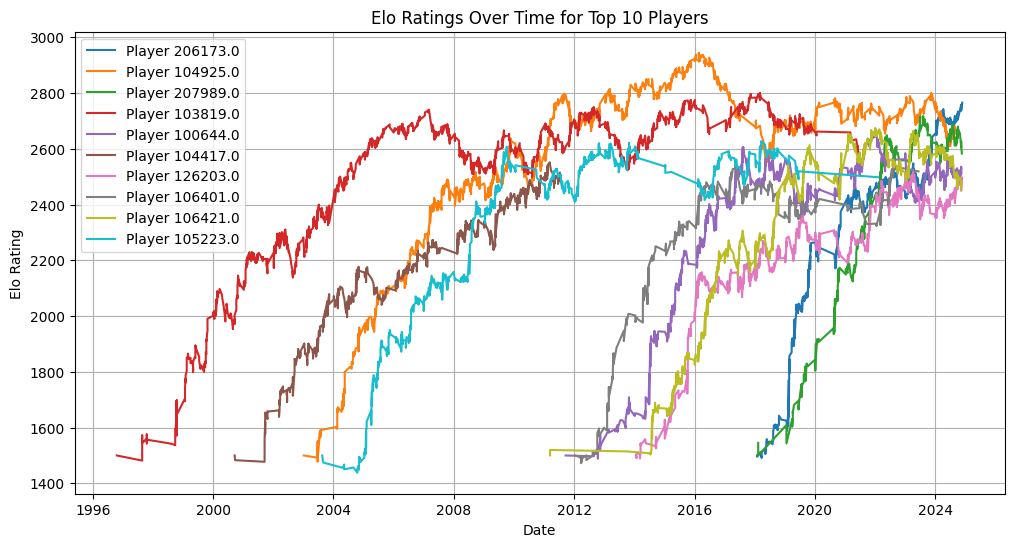

In [172]:
# Time series plot of the Elo ratings of the top 10 players

import matplotlib.pyplot as plt

# Filter data for top 10 players
top_player_ids = [player_id for player_id, _ in top_players]
filtered_data = data[data['winner_id'].isin(top_player_ids) | data['loser_id'].isin(top_player_ids)]

# Prepare data for plotting
filtered_data['tourney_date'] = pd.to_datetime(filtered_data['tourney_date'], format='%Y%m%d')
filtered_data = filtered_data.sort_values(by='tourney_date')

# Plot Elo ratings over time
plt.figure(figsize=(12, 6))
for player_id in top_player_ids:
    player_data = filtered_data[(filtered_data['winner_id'] == player_id) | (filtered_data['loser_id'] == player_id)]
    player_data['elo'] = player_data.apply(
        lambda row: row['winner_elo'] if row['winner_id'] == player_id else row['loser_elo'], axis=1
    )
    plt.plot(player_data['tourney_date'], player_data['elo'], label=f'Player {player_id}')

plt.title('Elo Ratings Over Time for Top 10 Players')
plt.xlabel('Date')
plt.ylabel('Elo Rating')
plt.legend()
plt.grid()
plt.show()
